In [1]:
from fastai.vision import *
from fastai.metrics import error_rate
from torchvision.models import *
from tqdm import tqdm_notebook
import pandas as pd
from PIL import Image as Image_px
import matplotlib.pyplot as plt
from torchvision import transforms

In [2]:
imgdir = Path("/home/jfang/fastai/data/tcga_experiment/images/sorted")

In [3]:
fnames = get_image_files(imgdir, recurse = True)

In [4]:
train_counter = 0
valid_counter = 0
for i in tqdm_notebook(fnames):
    if "train" in str(i).split("/")[-1]:
        train_counter += 1
    if "valid" in str(i).split("/")[-1]:
        valid_counter += 1

train_counter, valid_counter

/home/jfang/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


(217559, 39331)

In [5]:
fnames[:5]

[PosixPath('/home/jfang/fastai/data/tcga_experiment/images/sorted/Normal/valid_TCGA-43-6773-11A-01-TS1.6e328690-6ad9-4d61-a421-96f08aa09424_37_12.jpeg'),
 PosixPath('/home/jfang/fastai/data/tcga_experiment/images/sorted/Normal/valid_TCGA-43-6773-11A-01-TS1.6e328690-6ad9-4d61-a421-96f08aa09424_36_8.jpeg'),
 PosixPath('/home/jfang/fastai/data/tcga_experiment/images/sorted/Normal/train_TCGA-44-6776-11A-01-TS1.699a84f4-0579-43e3-b3cd-434e6fd27071_13_30.jpeg'),
 PosixPath('/home/jfang/fastai/data/tcga_experiment/images/sorted/Normal/train_TCGA-22-4607-11A-01-TS1.fcf4a5ec-6817-4f4e-b618-7ff3bfa5dcf3_18_26.jpeg'),
 PosixPath('/home/jfang/fastai/data/tcga_experiment/images/sorted/Normal/train_TCGA-44-6776-11A-01-TS1.699a84f4-0579-43e3-b3cd-434e6fd27071_101_10.jpeg')]

In [6]:
is_valid_list = [True if "valid" in str(i).split('/')[-1] else False for i in tqdm_notebook(fnames)]
label_list = [str(i).split('/')[-2] for i in tqdm_notebook(fnames)]
relative_list = [str(i).split('sorted/')[-1] for i in tqdm_notebook(fnames)]

/home/jfang/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


/home/jfang/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/home/jfang/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
input_df = pd.DataFrame({'name': relative_list, 'label': label_list, 'is_valid': is_valid_list})
input_df.to_csv('../input_df.csv', index = False)
input_df

,name,label,is_valid
0,Normal/valid_TCGA-43-6773-11A-01-TS1.6e328690-...,Normal,True
1,Normal/valid_TCGA-43-6773-11A-01-TS1.6e328690-...,Normal,True
2,Normal/train_TCGA-44-6776-11A-01-TS1.699a84f4-...,Normal,False
3,Normal/train_TCGA-22-4607-11A-01-TS1.fcf4a5ec-...,Normal,False
4,Normal/train_TCGA-44-6776-11A-01-TS1.699a84f4-...,Normal,False
...,...,...,...
256885,TCGA-LUSC/train_TCGA-66-2785-01Z-00-DX1.b9439e...,TCGA-LUSC,False
256886,TCGA-LUSC/train_TCGA-60-2721-01A-01-TS1.4957a2...,TCGA-LUSC,False
256887,TCGA-LUSC/train_TCGA-33-4589-01A-01-TS1.bd46be...,TCGA-LUSC,False
256888,TCGA-LUSC/train_TCGA-NK-A5CR-01Z-00-DX1.A7C57B...,TCGA-LUSC,False


In [3]:
input_df = pd.read_csv('../input_df.csv')

In [4]:
#input_df2 = input_df[0:40000]

In [44]:
def compute_averages(path, df):
    x_tot = 0
    x2_tot = 0
    counted_ones = len(df)
    for i in tqdm_notebook(range(len(df))):
        imagearray = np.array(Image_px.open(path/df['name'][i]))/256
        x_tot += imagearray.mean(axis=(0,1))
        x2_tot += (imagearray**2).mean(axis=(0,1))
    channel_avr = x_tot/counted_ones
    channel_std = np.sqrt(x2_tot/counted_ones - channel_avr**2)
    return channel_avr, channel_std

In [45]:
avr, std = compute_averages(imgdir, input_df2)

/home/jfang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [46]:
avr, std

(array([0.728585, 0.555791, 0.684865]), array([0.203663, 0.252322, 0.201958]))

In [47]:
avr*256, std*256

(array([186.517792, 142.282375, 175.325511]),
 array([52.137733, 64.59452 , 51.701347]))

In [5]:
ccccc = np.array(Image_px.open(imgdir/input_df['name'][1]))
ccccc.shape

(456, 456, 3)

In [6]:
mutect2_info = pd.read_csv(imgdir/"../lung_mutect2.csv")

In [7]:
len(mutect2_info)

2555

In [8]:
mutect2_info["IMPACT"].value_counts()

MODERATE    1674
HIGH         576
LOW          283
MODIFIER      22
Name: IMPACT, dtype: int64

In [9]:
mutect2_info.drop(mutect2_info[mutect2_info['IMPACT']=="LOW"].index, inplace = True) 

In [10]:
mutect2_info["IMPACT"].value_counts()

MODERATE    1674
HIGH         576
MODIFIER      22
Name: IMPACT, dtype: int64

In [11]:
patient_list = pd.read_csv(imgdir/'../gdc_manifest_20200627_013823.txt', delimiter = '\t')['filename'][:150]

In [12]:
patient_list = pd.DataFrame([i[:12] for i in list(patient_list)]).drop_duplicates().reset_index(drop=True)

In [13]:
patient_list

,0
0,TCGA-49-4506
1,TCGA-66-2756
2,TCGA-43-3920
3,TCGA-43-8115
4,TCGA-55-7727
...,...
136,TCGA-78-7542
137,TCGA-97-7554
138,TCGA-75-5147
139,TCGA-66-2771


In [14]:
list(mutect2_info[mutect2_info["Patient_ID"]=="TCGA-49-4506"]["Hugo_Symbol"])

['KRAS', 'KEAP1']

In [15]:
mutation_list = ["EGFR","FAT1","FAT4","KEAP1","KRAS","LRP1B","NF1","SETBP1","STK11","TP53"]
table = [mutation_list]
for i in list(patient_list[0]):
    mutation_values = [0]*len(mutation_list)
    mutations = list(mutect2_info[mutect2_info["Patient_ID"]==i]["Hugo_Symbol"])
    for j in range(len(mutation_list)):
        if mutation_list[j] in mutations:
            mutation_values[j] = 1
    table.append(mutation_values)

In [16]:
reference = pd.concat([patient_list, pd.DataFrame(table[1:],columns=table[0])], axis = 1).set_index(0)

In [17]:
tuple(reference.loc['TCGA-49-4506'])

(0, 0, 0, 1, 1, 0, 0, 0, 0, 0)

In [18]:
reference.columns

Index(['EGFR', 'FAT1', 'FAT4', 'KEAP1', 'KRAS', 'LRP1B', 'NF1', 'SETBP1',
       'STK11', 'TP53'],
      dtype='object')

In [19]:
paths = list(input_df['name'])
re.findall('(TCGA-[A-Z0-9]+-[A-Z0-9]+)', paths[0])[0] 

'TCGA-43-6773'

In [20]:
import matplotlib.gridspec as gridspec

In [21]:
class MultiTaskDataset(Dataset):
    def __init__(self, images_df, reference_df, tfms, imgpath, classes_str, size=224):
        self.imgpath = imgpath
        self.paths = list(images_df.name)
        self.labels = list(images_df.label)
        self.reference_df = reference_df
        self.tfms = tfms
        self.size = size
        self.classes_str = classes_str
        self.img_avr = [0.728585, 0.555791, 0.684865]
        self.img_std = [0.203663, 0.252322, 0.201958]
        self.norm = transforms.Normalize(self.img_avr,self.img_std) #computed

    def __len__(self): return len(self.paths)

    def __getitem__(self,idx):
        #dealing with the image
        img = Image_px.open(self.imgpath/self.paths[idx]).convert('RGB')
        img = Image(pil2tensor(img, dtype=np.float32).div_(255))
        img = img.apply_tfms(self.tfms, size = self.size)
        img = self.norm(img.data)

        #dealing with the labels
        label = self.labels[idx]
        mutant_list = [0]*10
        
        if label != 0:
            #extract mutational data
            patientID = re.findall('(TCGA-[A-Z0-9]+-[A-Z0-9]+)', self.paths[idx])[0]
            mutant_list = list(self.reference_df.loc[patientID])
        
        return img.data, label, mutant_list
    
    def show(self, idx):
        x, y_label, y_mutations = self.__getitem__(idx)
        mutation_list = list(self.reference_df.columns)
        img = (np.floor((x.numpy().transpose((1,2,0))*np.array(self.img_std)
                         +np.array(self.img_avr))*255).astype(np.uint8))
        
        fig = plt.figure(constrained_layout = True)
        k = 15
        spec = gridspec.GridSpec(ncols=k, nrows=k+2, figure=fig)
        f_ax1 = fig.add_subplot(spec[:k, :])
        f_ax2 = fig.add_subplot(spec[k:, :])
        
        f_ax1.imshow(img)
        f_ax1.set_title(str(y_label)+": "+self.classes_str[y_label])
        
        f_ax2.axis('tight')
        f_ax2.axis('off')
        mut_table = f_ax2.table(cellText=np.array([y_mutations]),colLabels=mutation_list,loc='center')
        
        for i in range(len(y_mutations)):
            if y_mutations[i]==1:
                mut_table[(0, i)].set_facecolor("#ccf3e0")
                mut_table[(1, i)].set_facecolor("#56b5fd")
        

In [22]:
tfms = get_transforms()
classes_str = ["Normal", "TCGA-LUAD", "TCGA-LUSC"]
train_rows = input_df[input_df["is_valid"]==False].replace(classes_str, list(range(len(classes_str))))
valid_rows = input_df[input_df["is_valid"]==True].replace(classes_str, list(range(len(classes_str))))
train_ds = MultiTaskDataset(train_rows, reference, tfms[0], imgdir, classes_str)
valid_ds = MultiTaskDataset(valid_rows, reference, tfms[1], imgdir, classes_str)
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=32, shuffle=True)
data = DataBunch(train_dl, valid_dl)

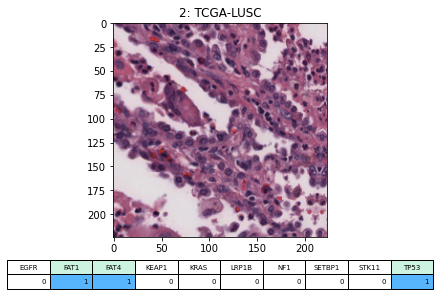

In [23]:
train_ds.show(200000)

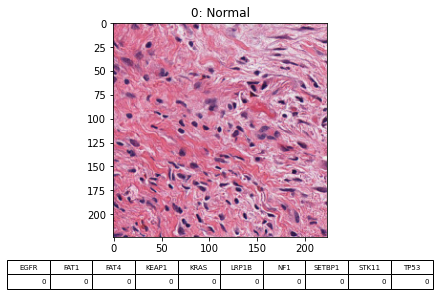

In [24]:
valid_ds.show(0)

In [25]:
class MultiTaskModel(nn.Module):
    def __init__(self, arch, n_mutations, ps=0.5):
        super(MultiTaskModel,self).__init__()
        self.encoder = create_body(arch)
        self.tumor_class = create_head(1024,3,ps=ps)
        
        self.n_mutations = n_mutations
        self.mut_class = create_head(1024, self.n_mutations, ps=ps)
        
    def forward(self,x):

        x = self.encoder(x)
        cancer_classify = self.tumor_class(x)

        mut_classify = self.mut_class(x)
        '''
        for i in range(self.n_mutations):
            #mut_classify.append(self.mut_class[i](x))
            mut_classify = self.mut_class[i](x)
        '''
        return (cancer_classify, mut_classify)

In [26]:
class MultiTaskLossWrapper(nn.Module):
    def __init__(self, n_tasks_mutation):
        super(MultiTaskLossWrapper, self).__init__()
        self.n_tasks_mutation = n_tasks_mutation
        self.log_vars1 = nn.Parameter(torch.zeros((1)))
        self.log_vars2 = nn.Parameter(torch.zeros((1)))

    def forward(self, preds, label, mutant_list):

        lossFunc1 = CrossEntropyFlat(weight=[5.0,1,1])
        lossFunc2 = BCEWithLogitsFlat(weight=[1,2.5])
        #sages = (age*4.75).exp_()
        #idx1 = (sages <20) | ((sages > 40) & (sages <= 60))
        #idx2 = sages > 60
        #loss0 = mse(preds[0], age) + 2*mse(preds[0][idx1],age[idx1]) + 3*mse(preds[0][idx2],age[idx2]) #trying to account for the imbalance
        
        loss0 = lossFunc1(preds[0],label)
        precision0 = torch.exp(-self.log_vars1[0])
        loss0 = precision0*loss0 + self.log_vars1[0]
        
        loss1 = lossFunc2(preds[1],mutant_list)
        precision1 = torch.exp(-self.log_vars2[0])
        loss1 = precision1*loss1 + self.log_vars2[0]
            
        
        losses = loss0+loss1
        return losses

In [27]:
import functools
def acc_classify(preds, label, mutant_list): 
    return accuracy(preds[0], label)
def acc_mutation(i, preds, label, mutant_list): 
    return accuracy(preds[1][i], mutant_list[i])
metrics = {}
metrics['Cancer Type'] = acc_classify
#for i in range(len(mutation_list)):
#    metrics[mutation_list[i]+"_acc"] = functools.partial(acc_mutation, i)

In [28]:
metrics

{'Cancer Type': <function __main__.acc_classify(preds, label, mutant_list)>}

In [29]:
model = MultiTaskModel(resnet50, 10, ps=0.25)

loss_func = MultiTaskLossWrapper(10).to(data.device) #just making sure the loss is on the gpu

learn = Learner(data, model, loss_func=loss_func, callback_fns=ShowGraph)


#spliting the model so that I can use discriminative learning rates
learn.split([learn.model.encoder[:6],
             learn.model.encoder[6:],
             nn.ModuleList([learn.model.tumor_class, learn.model.mut_class])]);

#first I'll train only the last layer group (the heads)
learn.freeze()


In [30]:
learn.model

MultiTaskModel(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv

In [31]:
random_preds = torch.tensor([[0.9,0.1,0.3], [0.15, 0.2, 0.6]]).float()
random_labels = torch.tensor([[1,0,1], [1, 1, 0]]).float()

In [32]:
cc = BCEWithLogitsFlat()

In [33]:
accuracy_thresh(random_preds, random_labels, sigmoid = False)

tensor(0.3333)

In [34]:
??accuracy_thresh

In [35]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


ValueError: too many values to unpack (expected 2)